SELECT absmag_r,uminusr FROM StellarMasses LIMIT 10000
-109.501725 16.518975 -0.506175 5.567925


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

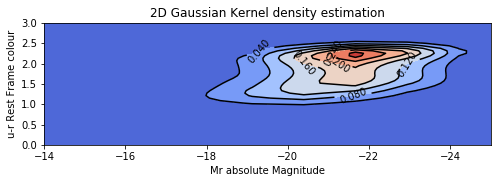

In [4]:
#
# Based on https://towardsdatascience.com/simple-example-of-2d-density-plots-in-python-83b83b934f67
#
import numpy as np
import scipy.stats as st
from astroquery.gama import GAMA
import matplotlib.pyplot as plt

x_col = 'absmag_r'
y_col = 'uminusr'
query = 'SELECT '+x_col+','+y_col+' FROM StellarMasses LIMIT 10000' 
print(query)
result = GAMA.query_sql(query)
x = result[x_col]
y = result[y_col]

# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)

# Create meshgrid
delx = 100j
#xx, yy = np.mgrid[xmin:xmax:delx, ymin:ymax:delx]
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])

# Create Guassian Kernel
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
#ax.set_xlim(xmin, xmax)
ax.set_xlim(-14,-25)
#ax.set_ylim(ymin, ymax)
ax.set_ylim(0, 3)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
#ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
#ax.imshow(np.rot90(f), cmap='coolwarm', extent=[-25, -13, 0, 5])
ax.imshow(np.rot90(f), cmap='coolwarm')
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Mr absolute Magnitude')
ax.set_ylabel('u-r Rest Frame colour')
plt.title('2D Gaussian Kernel density estimation')




